# Data Analysis Examples

## 1.USA.gov Data from Bitly

In [ ]:
from numpy.random import randn
import numpy as np
np.random.seed(123)
import os
import matplotlib.pyplot as plt
import pandas as pd
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4)
pd.options.display.max_rows = 20

In [5]: path = 'datasets/bitly_usagov/example.txt'

In [6]: open(path).readline()
Out[6]: '{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11
(KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1,
"tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l":
"orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r":
"http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u":
"http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc":
1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [ ]:
import json
path = 'datasets/bitly_usagov/example.txt'
records = [json.loads(line) for line in open(path)]

In [18]: records[0]
Out[18]:
{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko)
Chrome/17.0.963.78 Safari/535.11',
 'al': 'en-US,en;q=0.8',
 'c': 'US',
 'cy': 'Danvers',
 'g': 'A6qOVH',
 'gr': 'MA',
 'h': 'wfLQtf',
 'hc': 1331822918,
 'hh': '1.usa.gov',
 'l': 'orofrog',
 'll': [42.576698, -70.954903],
 'nk': 1,
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 't': 1331923247,
 'tz': 'America/New_York',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

### Counting Time Zones in Pure Python

In [ ]:
time_zones = [rec['tz'] for rec in records]

In [ ]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]
time_zones[:10]

In [ ]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [ ]:
from collections import defaultdict

def get_counts2(sequence):
    counts = defaultdict(int) # values will initialize to 0
    for x in sequence:
        counts[x] += 1
    return counts

In [ ]:
counts = get_counts(time_zones)
counts['America/New_York']
len(time_zones)

In [ ]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [ ]:
top_counts(counts)

In [ ]:
from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)

### Counting Time Zones with pandas

In [ ]:
import pandas as pd
frame = pd.DataFrame(records)
frame.info()
frame['tz'][:10]

In [ ]:
tz_counts = frame['tz'].value_counts()
tz_counts[:10]

In [ ]:
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'
tz_counts = clean_tz.value_counts()
tz_counts[:10]

In [ ]:
plt.figure(figsize=(10, 4))

In [ ]:
import seaborn as sns
subset = tz_counts[:10]
sns.barplot(y=subset.index, x=subset.values)

In [ ]:
frame['a'][1]
frame['a'][50]
frame['a'][51][:50]  # long line

In [ ]:
results = pd.Series([x.split()[0] for x in frame.a.dropna()])
results[:5]
results.value_counts()[:8]

In [ ]:
cframe = frame[frame.a.notnull()]

In [ ]:
cframe = cframe.copy()

In [ ]:
cframe['os'] = np.where(cframe['a'].str.contains('Windows'),
                        'Windows', 'Not Windows')
cframe['os'][:5]

In [ ]:
by_tz_os = cframe.groupby(['tz', 'os'])

In [ ]:
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts[:10]

In [ ]:
# Use to sort in ascending order
indexer = agg_counts.sum(1).argsort()
indexer[:10]

In [ ]:
count_subset = agg_counts.take(indexer[-10:])
count_subset

In [ ]:
agg_counts.sum(1).nlargest(10)

In [ ]:
plt.figure()

In [ ]:
# Rearrange the data for plotting
count_subset = count_subset.stack()
count_subset.name = 'total'
count_subset = count_subset.reset_index()
count_subset[:10]
sns.barplot(x='total', y='tz', hue='os',  data=count_subset)

In [ ]:
def norm_total(group):
    group['normed_total'] = group.total / group.total.sum()
    return group

results = count_subset.groupby('tz').apply(norm_total)

In [ ]:
plt.figure()

In [ ]:
sns.barplot(x='normed_total', y='tz', hue='os',  data=results)

In [ ]:
g = count_subset.groupby('tz')
results2 = count_subset.total / g.total.transform('sum')

## MovieLens 1M Dataset

In [ ]:
import pandas as pd

# Make display smaller
pd.options.display.max_rows = 10

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('datasets/movielens/users.dat', sep='::',
                      header=None, names=unames)

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('datasets/movielens/ratings.dat', sep='::',
                        header=None, names=rnames)

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('datasets/movielens/movies.dat', sep='::',
                       header=None, names=mnames)

In [ ]:
users[:5]
ratings[:5]
movies[:5]
ratings

In [ ]:
data = pd.merge(pd.merge(ratings, users), movies)
data
data.iloc[0]

In [ ]:
mean_ratings = data.pivot_table('rating', index='title',
                                columns='gender', aggfunc='mean')
mean_ratings[:5]

In [ ]:
ratings_by_title = data.groupby('title').size()
ratings_by_title[:10]
active_titles = ratings_by_title.index[ratings_by_title >= 250]
active_titles

In [ ]:
# Select rows on the index
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings

In [ ]:
mean_ratings = mean_ratings.rename(index={'Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)':
                           'Seven Samurai (Shichinin no samurai) (1954)'})

In [ ]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)
top_female_ratings[:10]

### Measuring Rating Disagreement

In [ ]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

In [ ]:
sorted_by_diff = mean_ratings.sort_values(by='diff')
sorted_by_diff[:10]

In [ ]:
# Reverse order of rows, take first 10 rows
sorted_by_diff[::-1][:10]

In [ ]:
# Standard deviation of rating grouped by title
rating_std_by_title = data.groupby('title')['rating'].std()
# Filter down to active_titles
rating_std_by_title = rating_std_by_title.loc[active_titles]
# Order Series by value in descending order
rating_std_by_title.sort_values(ascending=False)[:10]

## US Baby Names 1880–2010

In [4]: names.head(10)
Out[4]:
        name sex  births  year
0       Mary   F    7065  1880
1       Anna   F    2604  1880
2       Emma   F    2003  1880
3  Elizabeth   F    1939  1880
4     Minnie   F    1746  1880
5   Margaret   F    1578  1880
6        Ida   F    1472  1880
7      Alice   F    1414  1880
8     Bertha   F    1320  1880
9      Sarah   F    1288  1880

In [ ]:
!head -n 10 datasets/babynames/yob1880.txt

In [ ]:
import pandas as pd
names1880 = pd.read_csv('datasets/babynames/yob1880.txt',
                        names=['name', 'sex', 'births'])
names1880

In [ ]:
names1880.groupby('sex').births.sum()

In [ ]:
years = range(1880, 2011)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'datasets/babynames/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)

    frame['year'] = year
    pieces.append(frame)

# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)

In [ ]:
names

In [ ]:
total_births = names.pivot_table('births', index='year',
                                 columns='sex', aggfunc=sum)
total_births.tail()
total_births.plot(title='Total births by sex and year')

In [ ]:
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)

In [ ]:
names

In [ ]:
names.groupby(['year', 'sex']).prop.sum()

In [ ]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
# Drop the group index, not needed
top1000.reset_index(inplace=True, drop=True)

pieces = []
for year, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_values(by='births', ascending=False)[:1000])
top1000 = pd.concat(pieces, ignore_index=True)

In [ ]:
top1000

### Analyzing Naming Trends

In [ ]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [ ]:
total_births = top1000.pivot_table('births', index='year',
                                   columns='name',
                                   aggfunc=sum)

In [ ]:
total_births.info()
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]
subset.plot(subplots=True, figsize=(12, 10), grid=False,
            title="Number of births per year")

#### Measuring the increase in naming diversity

In [26]:
plt.figure()

NameError: name 'plt' is not defined

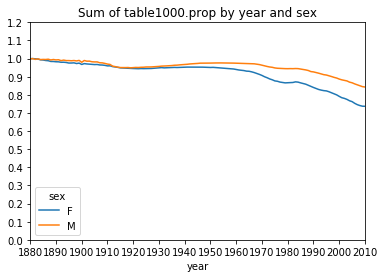

In [16]:
table = top1000.pivot_table('prop', index='year',
                            columns='sex', aggfunc=sum)
table.plot(title='Sum of table1000.prop by year and sex',
           yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

In [17]:
df = boys[boys.year == 2010]
df

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [18]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()
prop_cumsum[:10]
prop_cumsum.values.searchsorted(0.5)

116

In [19]:
df = boys[boys.year == 1900]
in1900 = df.sort_values(by='prop', ascending=False).prop.cumsum()
in1900.values.searchsorted(0.5) + 1

25

In [20]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1

diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')

In [21]:
fig = plt.figure()

NameError: name 'plt' is not defined

In [ ]:
diversity.head()
diversity.plot(title="Number of popular names in top 50%")

#### The “last letter” revolution

In [ ]:
# extract last letter from name column
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'

table = names.pivot_table('births', index=last_letters,
                          columns=['sex', 'year'], aggfunc=sum)

In [ ]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')
subtable.head()

In [ ]:
subtable.sum()
letter_prop = subtable / subtable.sum()
letter_prop

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female',
                      legend=False)

In [ ]:
plt.subplots_adjust(hspace=0.25)

In [ ]:
letter_prop = table / table.sum()
dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T
dny_ts.head()

In [ ]:
plt.close('all')

In [ ]:
fig = plt.figure()

In [ ]:
dny_ts.plot()

#### Boy names that became girl names (and vice versa)

In [ ]:
all_names = pd.Series(top1000.name.unique())
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]
lesley_like

In [ ]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

In [ ]:
table = filtered.pivot_table('births', index='year',
                             columns='sex', aggfunc='sum')
table = table.div(table.sum(1), axis=0)
table.tail()

In [ ]:
fig = plt.figure()

In [ ]:
table.plot(style={'M': 'k-', 'F': 'k--'})

## USDA Food Database

{
  "id": 21441,
  "description": "KENTUCKY FRIED CHICKEN, Fried Chicken, EXTRA CRISPY,
Wing, meat and skin with breading",
  "tags": ["KFC"],
  "manufacturer": "Kentucky Fried Chicken",
  "group": "Fast Foods",
  "portions": [
    {
      "amount": 1,
      "unit": "wing, with skin",
      "grams": 68.0
    },

    ...
  ],
  "nutrients": [
    {
      "value": 20.8,
      "units": "g",
      "description": "Protein",
      "group": "Composition"
    },

    ...
  ]
}

In [ ]:
import json
db = json.load(open('datasets/usda_food/database.json'))
len(db)

In [ ]:
db[0].keys()
db[0]['nutrients'][0]
nutrients = pd.DataFrame(db[0]['nutrients'])
nutrients[:7]

In [ ]:
info_keys = ['description', 'group', 'id', 'manufacturer']
info = pd.DataFrame(db, columns=info_keys)
info[:5]
info.info()

In [ ]:
pd.value_counts(info.group)[:10]

In [ ]:
nutrients = []

for rec in db:
    fnuts = pd.DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)

nutrients = pd.concat(nutrients, ignore_index=True)

In [ ]:
nutrients

In [ ]:
nutrients.duplicated().sum()  # number of duplicates
nutrients = nutrients.drop_duplicates()

In [ ]:
col_mapping = {'description' : 'food',
               'group'       : 'fgroup'}
info = info.rename(columns=col_mapping, copy=False)
info.info()
col_mapping = {'description' : 'nutrient',
               'group' : 'nutgroup'}
nutrients = nutrients.rename(columns=col_mapping, copy=False)
nutrients

In [ ]:
ndata = pd.merge(nutrients, info, on='id', how='outer')
ndata.info()
ndata.iloc[30000]

In [ ]:
fig = plt.figure()

In [ ]:
result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5)
result['Zinc, Zn'].sort_values().plot(kind='barh')

In [ ]:
by_nutrient = ndata.groupby(['nutgroup', 'nutrient'])

get_maximum = lambda x: x.loc[x.value.idxmax()]
get_minimum = lambda x: x.loc[x.value.idxmin()]

max_foods = by_nutrient.apply(get_maximum)[['value', 'food']]

# make the food a little smaller
max_foods.food = max_foods.food.str[:50]

In [ ]:
max_foods.loc['Amino Acids']['food']

## 2012 Federal Election Commission Database

In [ ]:
fec = pd.read_csv('datasets/fec/P00000001-ALL.csv')
fec.info()

In [ ]:
fec.iloc[123456]

In [ ]:
unique_cands = fec.cand_nm.unique()
unique_cands
unique_cands[2]

In [ ]:
parties = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

In [ ]:
fec.cand_nm[123456:123461]
fec.cand_nm[123456:123461].map(parties)
# Add it as a column
fec['party'] = fec.cand_nm.map(parties)
fec['party'].value_counts()

In [ ]:
(fec.contb_receipt_amt > 0).value_counts()

In [ ]:
fec = fec[fec.contb_receipt_amt > 0]

In [ ]:
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])]

### Donation Statistics by Occupation and Employer

In [22]:
fec.contbr_occupation.value_counts()[:10]

NameError: name 'fec' is not defined

In [ ]:
occ_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
   'C.E.O.': 'CEO'
}

# If no mapping provided, return x
f = lambda x: occ_mapping.get(x, x)
fec.contbr_occupation = fec.contbr_occupation.map(f)

In [ ]:
emp_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'SELF' : 'SELF-EMPLOYED',
   'SELF EMPLOYED' : 'SELF-EMPLOYED',
}

# If no mapping provided, return x
f = lambda x: emp_mapping.get(x, x)
fec.contbr_employer = fec.contbr_employer.map(f)

In [ ]:
by_occupation = fec.pivot_table('contb_receipt_amt',
                                index='contbr_occupation',
                                columns='party', aggfunc='sum')
over_2mm = by_occupation[by_occupation.sum(1) > 2000000]
over_2mm

In [ ]:
plt.figure()

In [ ]:
over_2mm.plot(kind='barh')

In [ ]:
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    return totals.nlargest(n)

In [ ]:
grouped = fec_mrbo.groupby('cand_nm')
grouped.apply(get_top_amounts, 'contbr_occupation', n=7)
grouped.apply(get_top_amounts, 'contbr_employer', n=10)

### Bucketing Donation Amounts

In [23]:
bins = np.array([0, 1, 10, 100, 1000, 10000,
                 100000, 1000000, 10000000])
labels = pd.cut(fec_mrbo.contb_receipt_amt, bins)
labels

NameError: name 'fec_mrbo' is not defined

In [24]:
grouped = fec_mrbo.groupby(['cand_nm', labels])
grouped.size().unstack(0)

NameError: name 'fec_mrbo' is not defined

In [ ]:
plt.figure()

In [ ]:
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1), axis=0)
normed_sums
normed_sums[:-2].plot(kind='barh')

### Donation Statistics by State

In [25]:
grouped = fec_mrbo.groupby(['cand_nm', 'contbr_st'])
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)
totals = totals[totals.sum(1) > 100000]
totals[:10]

NameError: name 'fec_mrbo' is not defined

In [ ]:
percent = totals.div(totals.sum(1), axis=0)
percent[:10]

## Conclusion